# Image Segmentation by Clustering 

## Project Description
Image segmentation is the task of partitioning an image into multiple segments. In this process, all the pixels that are part of the same object type get assigned to the same segments. For example, in a self-driving car's vision system, all pixels that are part of a pedestrian's image are assigned to the "Pedestrian" segment, etc.
Another example, in the analysis of satellite images, for example, you may want to measure how much total forest area there is in a region, color segmentation may be just fine. Here, in this example, we are interested in detecting the burning marks on parts manufactured by injection molding.

Idea:
 
*Fire detection based on image features has become a hotspot in fire monitoring.
    
    -Image segmentation method based on KMeans or GMM to monitor forest fires: we can segment the image,extract the suspected flame area color distribution characteristics and shape characteristics.
    -The forest flame model can judge whether or not there is a flame in the forest image.In other words, it can detect the appearance of fire regions from images.

*Detection of burning marks on parts  manufactured by injection molding using image features

Notes:

[1] Image segmentation is the first and the most important step in a contaminant/defect
detection/inspection system used in the industry.

[2] Image segmentation can be used for detection of defects (i.e.  flaws, cracks, or burns), and it usually involves some means of acquiring one or more images of the inspected product.

[3] The contaminant/detection process of an industrial product is an important stage of a modern
production factory. The large demand of quality products has lead producers to use automated systems. One
such system is the automated detection of defects/contaminants. An image of the product is taken and
automatically analysed by the system. The most important step of the process of inspecting that product is the
segmentation of the image into meaningful objects (defects and normal product).

## Importing the Libraries

In [162]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

## Importing the Libraries

In [163]:
image = imread("InjM_BurnMark1.png")
image.shape

(411, 493, 4)

## Checking the Original Image

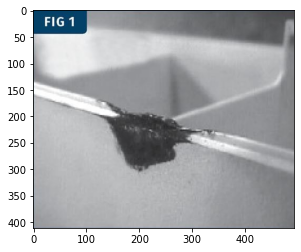

In [164]:
plt.imshow(image)

In [165]:
image.shape
X = image.reshape((-1, 3)) # why
#X = image.reshape(-1,1)

In [166]:
X.shape

(270164, 3)

## Clustering the Image into k segments

In [167]:
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k, random_state=42)

In [168]:
kmeans.fit(X)
kmeans.labels_

array([2, 0, 2, ..., 0, 2, 2], dtype=int32)

In [169]:
len(kmeans.labels_)

270164

In [170]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

## Showing the Segmented Image

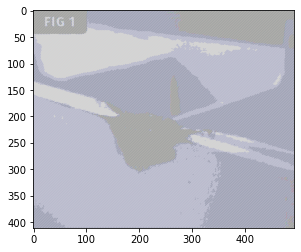

In [171]:
plt.imshow(segmented_img)

### Try Gaussian Mix Model

In [172]:
# Too tired! Do it yourself! Ahmad

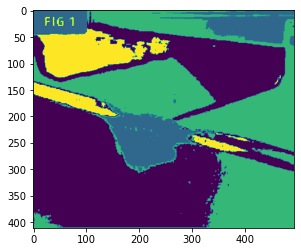

In [179]:
#Source :https://github.com/bnsreenu/python_for_microscopists/blob/master/052-GMM_image_segmentation.py
import numpy as np
import cv2



img = cv2.imread("InjM_BurnMark1.png")

# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

from sklearn.mixture import GaussianMixture as GMM

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=4, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
plt.imshow(segmented)
#cv2.imwrite("images/segmented.jpg", segmented)
